In [1]:
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [2]:
import torch
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Contraction path
        self.c1 = self.contract_block(3, 16)
        self.c2 = self.contract_block(16, 32)
        self.c3 = self.contract_block(32, 64)
        self.c4 = self.contract_block(64, 128)
        self.c5 = self.contract_block(128, 256)

        # Expansive path
        self.u6 = self.expand_block(256, 128)
        self.u7 = self.expand_block(128, 64)
        self.u8 = self.expand_block(64, 32)
        self.u9 = self.expand_block(32, 16)

        # Output layer
        self.outputs = nn.Conv2d(16, 1, kernel_size=1, stride=1, padding=0)

    def contract_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.1)
        )

    def expand_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.1)
        )

    def forward(self, x):
        c1 = self.c1(x)
        c2 = self.c2(c1)
        c3 = self.c3(c2)
        c4 = self.c4(c3)
        c5 = self.c5(c4)

        u6 = self.u6(c5, c4)
        u7 = self.u7(u6, c3)
        u8 = self.u8(u7, c2)
        u9 = self.u9(u8, c1)

        outputs = self.outputs(u9)
        return torch.sigmoid(outputs)

# Instantiate the model
model = UNet()
print(model)


UNet(
  (c1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout2d(p=0.1, inplace=False)
  )
  (c2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout2d(p=0.1, inplace=False)
  )
  (c3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dila

## Getting Dataset

In [3]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),#How do we want to transform the data?
    target_transform=None#How do we want to transform the labels?
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),#How do we want to transform the data?
    target_transform=None#How do we want to transform the labels?
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10160465.58it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 169999.81it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3223715.96it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5968014.65it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [11]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

## Visualising our data

Text(0.5, 1.0, '9')

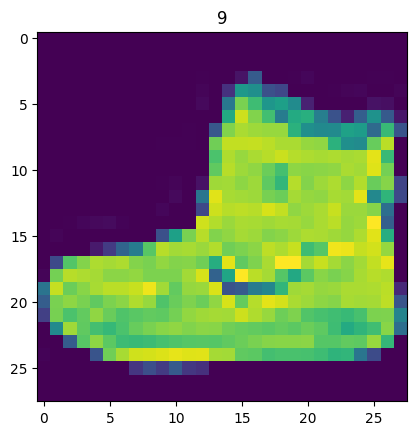

In [12]:
image,label=train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

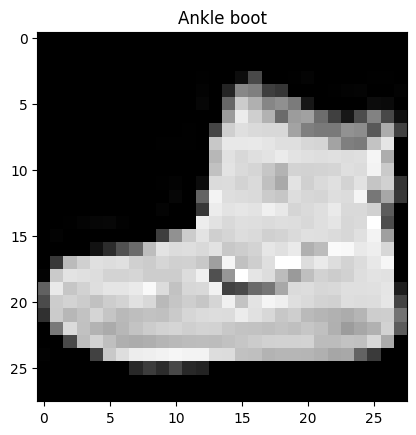

In [13]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_name[label])

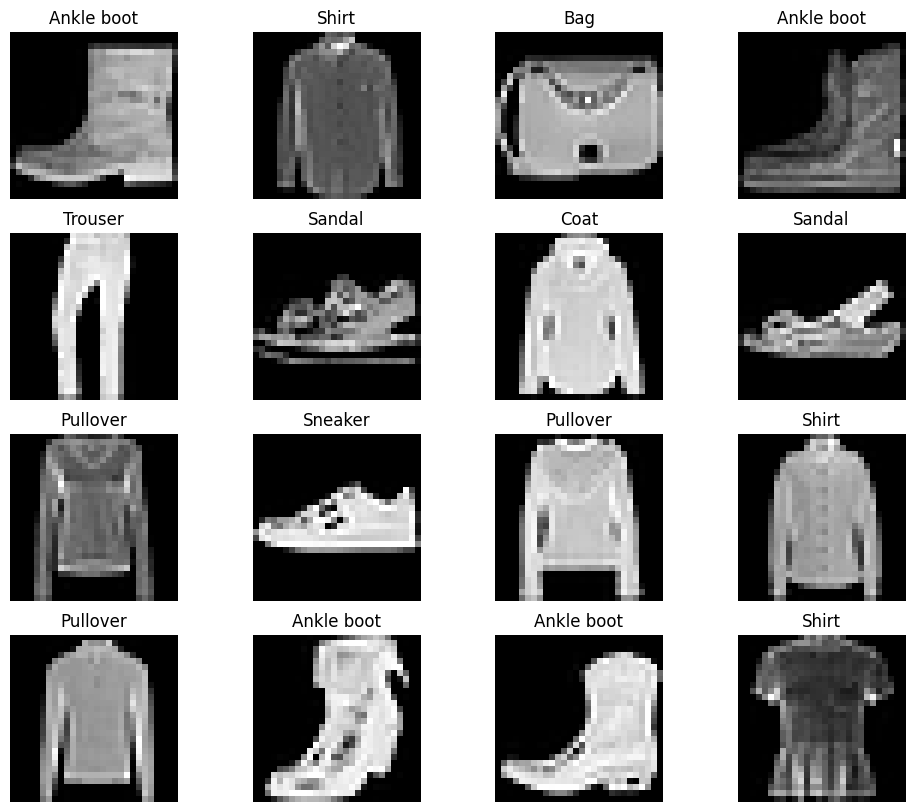

In [14]:
torch.manual_seed(42)
fig=plt.figure(figsize=(12,10))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)

## 2.Prepare DataLoader

Right now,our data is in the form of PyTorch datasets

DataLoader turns our data into python iterables

More specifically,we want to turn our data into mini-batches


In [15]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)
print(f"Length of train data loader:{len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train data loader:1875 batches of 32
Length of test dataloader:313 batches of 32


In [16]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

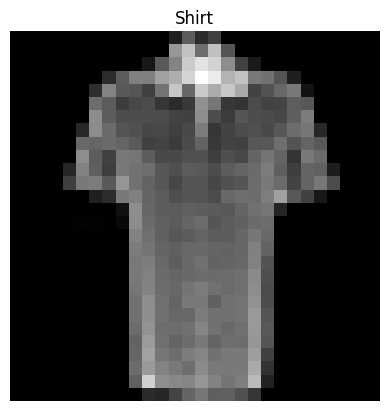

In [17]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)



## Model 0:Baseline Model

In [18]:
flatten_model=nn.Flatten()

x=train_features_batch[0]

output=flatten_model(x)

print(f"Shape before flattening:{x.shape}->[c,h,w]")
print(f"Shape after flattening:{output.shape}->[c,h*w]")

Shape before flattening:torch.Size([1, 28, 28])->[c,h,w]
Shape after flattening:torch.Size([1, 784])->[c,h*w]


We have turned our pixel data from height and width into one long feature vector
nn.Linear() layer likes the input to be in the form of feature vectors

In [19]:
class FashionMNISTV0(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

model_0=FashionMNISTV0(input_shape=784,
                       hidden_units=10,
                       output_shape=len(class_name))
model_0.to("cpu")

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Set up loss,optimizer and evaluation metrics

In [21]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [22]:
import requests
from pathlib import Path


if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [23]:
from helper_functions import accuracy_fn

## Creating a function to time our experiments

In [24]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """Prints difference between start and end time"""
  total_time=end-start
  print(f"Train time on {device}:{total_time:.3f} seconds")
  return total_time

## Training Loop

In [25]:
#import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n---")
  train_loss=0
  #add a loop to loop through the batches
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss/=len(train_dataloader.dataset)#avg loss per batch per epoch

  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred=model_0(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)

  print(f"\nTrain Loss:{train_loss:.5f} | Test Loss:{test_loss:.5f} |Test acc:{test_acc:.2f}%\n")

train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss:0.01845 | Test Loss:0.50954 |Test acc:82.04%

Epoch:1
---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss:0.01489 | Test Loss:0.47989 |Test acc:83.20%

Epoch:2
---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss:0.01422 | Test Loss:0.47664 |Test acc:83.43%

Train time on cpu:30.238 seconds


## Make Predictions

In [26]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(dataloader):
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss/=len(dataloader)
    acc/=len(dataloader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

model_0_results=eval_model(model_0,test_dataloader,loss_fn,accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## Model 1:Build a better model with non-linearity

In [27]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [28]:
class FashionMNISTV1(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

In [29]:
torch.manual_seed(42)
model_1=FashionMNISTV1(input_shape=784,
                       hidden_units=10,
                       output_shape=len(class_name)).to(device)

#check model device
next(model_1.parameters()).device


device(type='cuda', index=0)

In [30]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

## Functionizing training and test loops

In [31]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc=0,0
  model.to(device)
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)
    model.train()
    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss/=len(dataloader)
  train_acc/=len(dataloader)
  print(f"Train Loss:{train_loss:.5f} | Train accuracy:{train_acc:.2f}%")

def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
      X,y=X.to(device),y.to(device)
      test_pred=model(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,
                            y_pred=test_pred.argmax(dim=1))
    test_loss/=len(dataloader)
    test_acc/=len(dataloader)
    print(f"Test Loss:{test_loss:.5f} | Test accuracy:{test_acc:.2f}%")





In [32]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n----")
  train_step(model_1,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn
             )
  test_step(model_1,
            test_dataloader,
            loss_fn,
            accuracy_fn)

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
----
Train Loss:1.09199 | Train accuracy:61.34%
Test Loss:0.95636 | Test accuracy:65.00%
Epoch:1
----
Train Loss:0.78101 | Train accuracy:71.93%
Test Loss:0.72227 | Test accuracy:73.91%
Epoch:2
----
Train Loss:0.67027 | Train accuracy:75.94%
Test Loss:0.68500 | Test accuracy:75.02%
Train time on cuda:31.830 seconds


In [33]:
#Modify the eval_model function to set up device agnostic code
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(dataloader):
      X,y=X.to(device),y.to(device)
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss/=len(dataloader)
    acc/=len(dataloader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

In [34]:
model_1_results=eval_model(model_1,
                           test_dataloader,
                           loss_fn,
                           accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2:Building a CNN

In [35]:
class FashionMNISTV2(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(hidden_units,
                  hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,
                  hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,##keep a note of this
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    #print(x.shape)
    return x


In [36]:
torch.manual_seed(42)
model_2=FashionMNISTV2(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_name)).to(device)
model_2

FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Stepping through `nn.Conv2d()`

In [37]:
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
sample_image=images[0]
print(sample_image.shape)
sample_image

torch.Size([3, 64, 64])


tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [38]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0)
conv_output=conv_layer(sample_image)
conv_output.shape

torch.Size([10, 62, 62])

## Stepping through `nn.MaxPool2d()`

In [39]:
print(f"Sample image shape:{sample_image.shape}")
max_pool_layer=nn.MaxPool2d(kernel_size=2)
sample_image_through_conv=conv_layer(sample_image)
print(f"Sample image shape after conv layer:{sample_image_through_conv.shape}")
sample_image_pool=max_pool_layer(sample_image_through_conv)
print(f"Sample image shape after pooling layer:{sample_image_pool.shape}")

Sample image shape:torch.Size([3, 64, 64])
Sample image shape after conv layer:torch.Size([10, 62, 62])
Sample image shape after pooling layer:torch.Size([10, 31, 31])


## Set up loss function and optimizer

In [40]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

## Training and testing model2

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n---")
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2=timer()

total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---
Train Loss:0.59082 | Train accuracy:78.56%
Test Loss:0.36995 | Test accuracy:86.55%
Epoch:1
---
Train Loss:0.35935 | Train accuracy:87.00%
Test Loss:0.36364 | Test accuracy:87.05%
Epoch:2
---
Train Loss:0.32255 | Train accuracy:88.32%
Test Loss:0.31641 | Test accuracy:88.44%
Train time on cuda:55.088 seconds


In [42]:
model_2_results=eval_model(model=model_2,
                           dataloader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.34468042850494385,
 'model_acc': 87.77955271565496}

## Comapring all three models

In [43]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.476639,83.426518
1,FashionMNISTV1,0.685001,75.019968
2,FashionMNISTV2,0.344680,87.779553


In [44]:
compare_results["training_time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTV0,0.476639,83.426518,30.237731
1,FashionMNISTV1,0.685001,75.019968,31.830252
2,FashionMNISTV2,0.344680,87.779553,55.088069


## Make and evaluate random predictions with best model

In [45]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)
      pred_logit=model(sample)
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())

  #stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [46]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(f"Test sample image shape:{test_samples[0].shape}\n Test sample image label:{test_labels[0]}({class_name[test_labels[0]]})")

Test sample image shape:torch.Size([1, 28, 28])
 Test sample image label:1(Trouser)


In [47]:
pred_probs=make_predictions(model=model_2,
                            data=test_samples)
pred_probs[:2]

tensor([[3.5050e-01, 4.6967e-01, 3.3510e-03, 1.5618e-01, 2.6266e-03, 1.0332e-05,
         1.6220e-02, 5.9038e-05, 1.3779e-03, 6.1742e-06],
        [6.9832e-03, 1.5860e-03, 7.7451e-01, 2.8570e-02, 1.4420e-01, 9.5989e-06,
         4.3350e-02, 8.4761e-05, 6.4765e-04, 6.0921e-05]])

In [48]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes


tensor([1, 2, 4, 8, 2, 2, 0, 9, 3])

In [49]:
test_labels

[1, 2, 4, 8, 4, 2, 0, 9, 3]

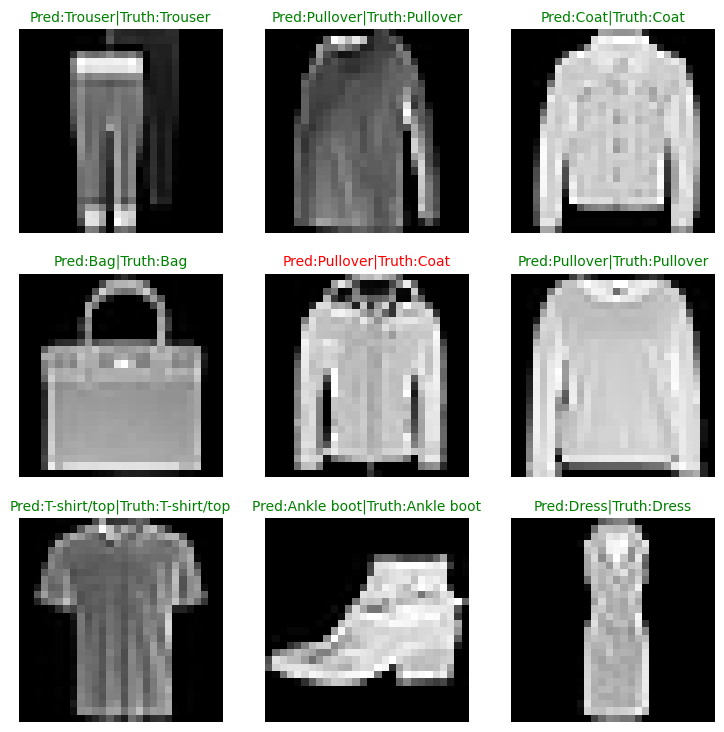

In [50]:
plt.figure(figsize=(9,9,))
nrows=3
ncols=3

for i ,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label=class_name[pred_classes[i]]
  true_label=class_name[test_labels[i]]
  title_text=f"Pred:{pred_label}|Truth:{true_label}"
  if pred_label==true_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

## Plotting a confusion matrix

In [51]:
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making Predictions"):
    X,y=X.to(device),y.to(device)
    y_logit=model_2(X)
    y_pred=torch.softmax(y_logit.squeeze(),dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [52]:
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.1 MB/s eta 0:00:00
mlxtend version:0.23.0


In [53]:
len(y_pred_tensor)

10000

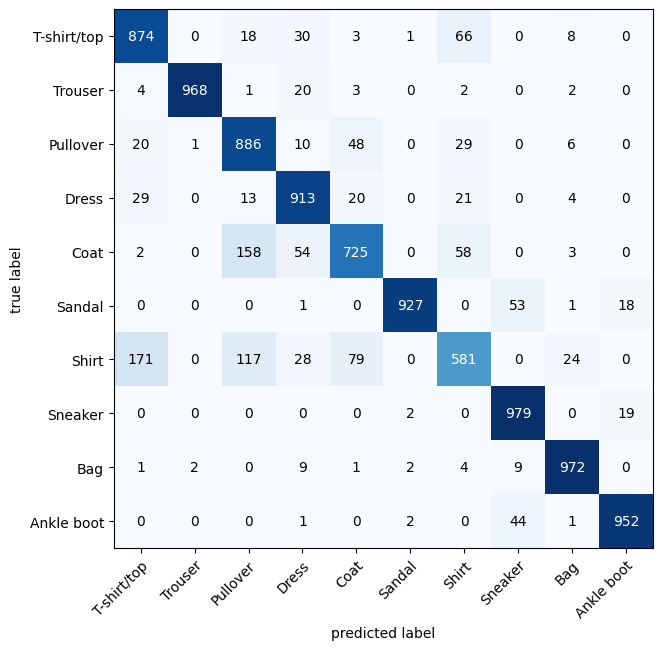

In [54]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(task="multiclass",num_classes=len(class_name))
confmat_tensor=confmat(preds=y_pred_tensor,target=test_data.targets)

#Plotting the confusion matrix
fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                             class_names=class_name,
                             figsize=(10,7),
                            )

## Save and load best performing model

In [55]:
from pathlib import Path

#create model directory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
#create model save path
MODEL_NAME="_03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
#save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)#Only saves the learned parameters

Saving model to:models/_03_pytorch_computer_vision_model_2.pth


In [56]:
torch.manual_seed(42)
loaded_model_2=FashionMNISTV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_name))

#Load in the saved stats_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [57]:
torch.manual_seed(42)
loaded_model_2_results=eval_model(model=loaded_model_2,
                           dataloader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.34468042850494385,
 'model_acc': 87.77955271565496}

In [59]:
#Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-4)

tensor(True)